In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0,0.5,'Feature 1')

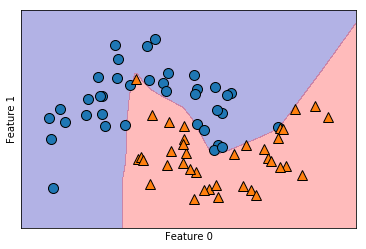

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

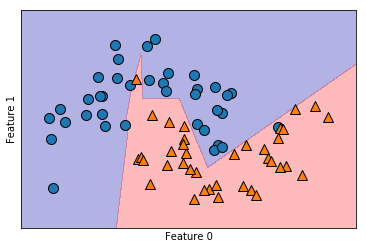

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [7]:
cancer = load_breast_cancer()
print("maxima: \n{}".format(cancer.data.max(axis=0)))

maxima: 
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print("Accuracy on training: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training: 0.91
Accuracy on test: 0.88


In [13]:
X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

mlp = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)
print("Accuracy on training: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training: 0.991
Accuracy on test: 0.965


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
mlp = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_scaled, y_train)
print("Accuracy on training: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training: 0.993
Accuracy on test: 0.972


In [15]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1).fit(X_train_scaled, y_train)
print("Accuracy on training: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training: 0.988
Accuracy on test: 0.972


In [ ]:
# 不確実性推定は、decision_functionかpredict_proba
# 前者のスケールは特徴量のスケールに影響受けるので解釈が難しい
# 後者の方を基本使いそう